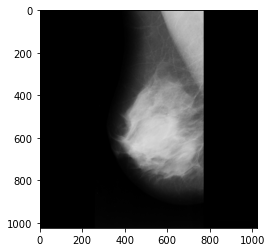

In [39]:
import csv
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import numpy as np
from glob import glob
import h5py
import pandas as pd
from PIL import Image

def display_pgm_image(file_path):
    img = cv2.imread(file_path)
    plt.imshow(img, cmap='gray')
    plt.show()

def pgm_to_png(inpput_file,output_file):
    img = Image.open(inpput_file)
    img.save(output_file)

# Replace 'your_image.pgm' with the actual path to your PGM image file
# pgm_path = '..//..//datasets//image//MIAS//all-mias//mdb001.pgm'
# display_pgm_image(pgm_path)

for i in glob('..//..//datasets//image//MIAS//all-mias//*.pgm'):
    x = i.split('\\')[-1].split('.')[0]
    pgm_to_png(i,('..//..//datasets//image//MIAS_png//'+x+'.png'))

In [12]:
base_h5 = os.path.join('..//..//datasets//image//MIAS//all_mias_scans.h5')

with h5py.File(base_h5, 'r') as f:
    mammo_df = pd.DataFrame(
        {k: v[()] if len(v.shape)==1 else [sub_v[()] for sub_v in v] 
         for k,v in f.items()}
    )
for k in mammo_df.columns:
    if isinstance(mammo_df[k].values[0], bytes):
        mammo_df[k] = mammo_df[k].map(lambda x: x.decode())
mammo_df.to_csv('..//..//datasets//image//MIAS//all_mias_scans.csv')

excluded_values = ['CALC', 'ARCH', 'ASYM', 'NORM']
filtered_mammo_df = mammo_df.loc[~mammo_df['CLASS'].isin(excluded_values)]
filtered_mammo_df.to_csv('..//..//datasets//image//MIAS//mass_mias_scans.csv')

..//..//datasets//image//MIAS//all-mias.tar.gz 已解压缩
